In [9]:

import cv2
import numpy as np
from matplotlib import pyplot as plt


In [17]:
def get_4_neighbourhood(first_x: int, second_x: int, first_y: int, second_y: int) -> int:
    """
    > This function returns the number of neighbours of a cell in a 2D grid

    :param first_x: the x coordinate of the first point
    :type first_x: int
    :param second_x: the x coordinate of the second point
    :type second_x: int
    :param first_y: the y coordinate of the first point
    :type first_y: int
    :param second_y: the y coordinate of the second point
    :type second_y: int
    """
    if first_x < second_x:
        return 0

    if first_y < second_y:
        return 6

    if first_y > second_y:
        return 2

    if first_x > second_x:
        return 4

In [19]:
def compute_freeman_chaincode_4_neighbourhood(contours: np.ndarray):
    """
    It computes the Freeman chain code for each contour in the input array

    :param contours: a list of contours, each contour is a list of points, each point is a list of x,y
    coordinates
    :type contours: np.ndarray
    """
    shifted = np.roll(contours, 1, axis=0)
    return np.array([get_4_neighbourhood(x1, x2, y1, y2)
    for x1, x2, y1, y2 in zip(contours[:, 0], shifted[:, 0], contours[:, 1], shifted[:, 1])])

In [24]:
img = cv2.bitwise_not(cv2.imread("dvojka.png", cv2.IMREAD_GRAYSCALE))


(50, 1, 2)


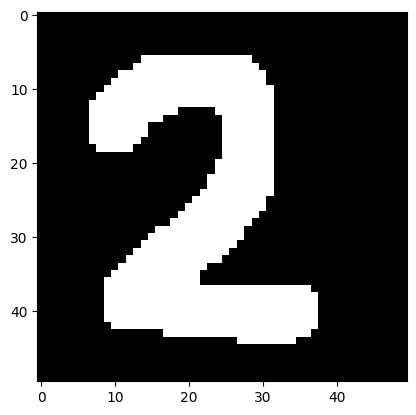

freeman code [0 0 0 0 2 2 4 6 6 6 4 6 4 6 4 2 2 0 2 0 2 0 0 0 2 2 4 2 4 2 4 6 4 6 6 0 0
 0 6 6 4 6 6 6 6 6 6 0 6 0]


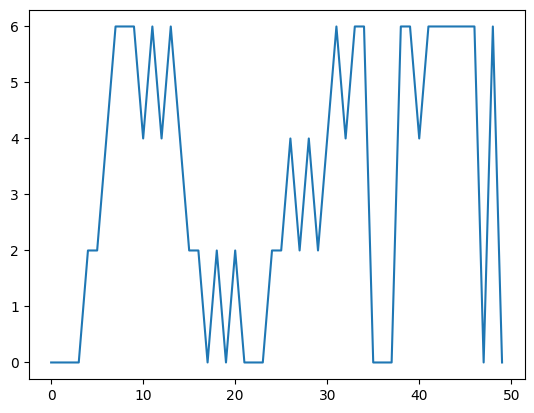

In [27]:
contour, _ = cv2.findContours(img, 1, 2)
contour = contour[0]
print(contour.shape)

freeman_code = compute_freeman_chaincode_4_neighbourhood(np.squeeze(contour))
plt.imshow(img, cmap="gray")
plt.show()
plt.plot(np.arange(len(freeman_code)), freeman_code)

print("freeman code", freeman_code)


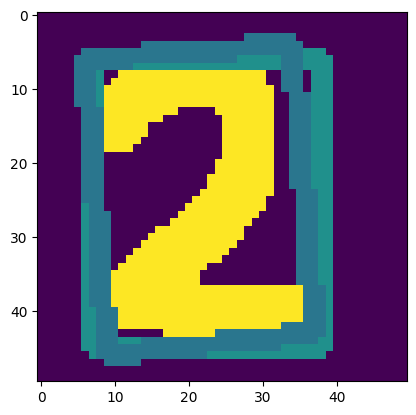

In [14]:
x, y, w, h = cv2.boundingRect(contour)

plt.imshow(cv2.rectangle(img, (x, y), (x + w, y + h), 128, 2))

rect = cv2.minAreaRect(contour)
box = cv2.boxPoints(rect)
plt.imshow(cv2.drawContours(img, [np.squeeze(np.array(box, dtype=int))], 0, 100, 2))